<font size=3>This notebook comapres the free energy values obtained for the montecarlo search oligomer selections with umbrella sampling and pyMBAR</font>

In [89]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.interpolate import make_interp_spline

In [90]:
list_ = ['CT','TC','GTA','CC','GTT','AAG','GCC','GCG','AAA','CG']
# list_ = ['CT','TC','CC','GTA','GTT','CG','GCC','GCG','AAG','AAA']
list_1 = ['01','02','03','04','05','06','07','08','09','10']

try:
    path = '/Volumes/orange/alberto.perezant/t.desilva/Umbrella_montecarlo/' # macbook
    dict_MBAR = {i:np.loadtxt(fname=path+i+'/pmf.dat', skiprows=2) for i in list_}
except:
    path = 'O:/Umbrella_montecarlo/' # windows
    dict_MBAR = {i:np.loadtxt(fname=path+i+'/pmf.dat', skiprows=2) for i in list_}

In [91]:
plt.rcParams["font.family"] = "serif"

<font size=3>Plot the PMF and its first derivative. Highest peak of the 1st derivative in PMF minimas are selected as the points to calculate free energy difference.</font>

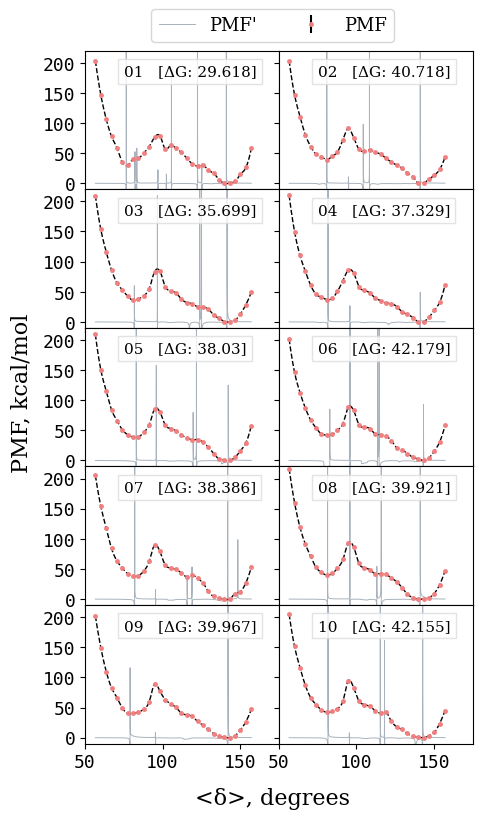

In [92]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(5,9))
ax = ax.flatten()

f_umbrella = []

for i, seq in enumerate(list_):
    ax[i].errorbar(dict_MBAR[seq][:,0], dict_MBAR[seq][:,1]*24, dict_MBAR[seq][:,2], color='lightcoral', fmt='o', capsize=0, capthick=0.5, ecolor='k', markersize=2.5, label='PMF')
    x_smooth = np.linspace(dict_MBAR[seq][:,0].min(), dict_MBAR[seq][:,0].max(), 5000)  # 500 points for smooth curve
    spline = make_interp_spline(dict_MBAR[seq][:,0], dict_MBAR[seq][:,1]*24, k=2)  # k is the degree of the spline (cubic by default)
    y_smooth = spline(x_smooth)
    dy = np.gradient(x_smooth, y_smooth)
    ax[i].plot(x_smooth, y_smooth, '--', linewidth=1, color='k')
    ax[i].plot(x_smooth, dy, linewidth=0.7, color='slategray', alpha=0.6, label='PMF\'')
    ax[i].set_ylim(-10,220)
    ax[i].set_yticks(range(0,220,50))
    ax[i].set_yticklabels(range(0,220,50), fontsize=13, family='monospace')
    ax[i].set_xlim(50,175)
    ax[i].set_xticks(range(50,170,50))
    ax[i].set_xticklabels(range(50,170,50), fontsize=13, family='monospace')
    # ax[i].grid(True)
    
    f1 = y_smooth[np.argmax(dy[np.where(x_smooth<90)[0]])] # North free energy
    f2 = y_smooth[np.where(dy == dy[np.where(x_smooth>130)[0]].max())[0][0]] # South free energy
    f_umbrella.append(f1-f2)
    f = round(f1 - f2, 3)
    
    if (i+1)%2==0:
        ax[i].set_yticklabels([])
        
    if i<8:
        ax[i].set_xticklabels([])
    
    textstr = f'{list_1[i]}   [ΔG: {f}]'
    ax[i].text(0.2, 0.9, textstr, transform=ax[i].transAxes, fontsize=11, 
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gainsboro'))
    
fig.text(0.5, 0.043, '<δ>, degrees', ha='center', fontsize=16)
fig.text(-0.025, 0.5, 'PMF, kcal/mol', va='center', rotation='vertical', fontsize=16)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=13, bbox_to_anchor=[0.5, 0.88])

plt.subplots_adjust(wspace=0, hspace=0)

In [93]:
f_dgm = np.loadtxt('montecarlo_free_energy.dat', usecols=1, max_rows=10)
# f_dgm = np.loadtxt('../../../DIM_pucker/Analyze/Validation_/montecarlo_free_energy.dat', usecols=1, max_rows=10)

Text(0, 0.5, 'ΔG: DGM, kcal/mol')

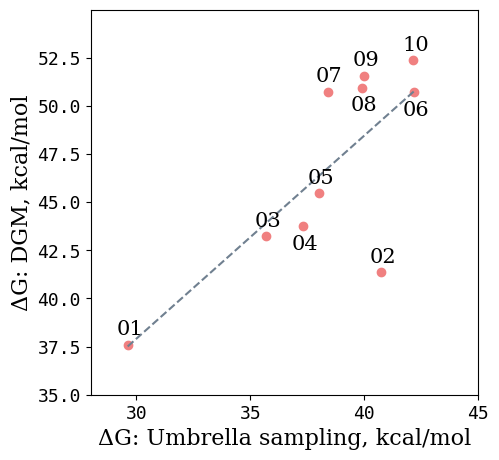

In [114]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(f_umbrella, f_dgm, color='lightcoral')
slope, intercept = np.polyfit(f_umbrella, f_dgm, 1)
x_line = np.linspace(min(f_umbrella), max(f_umbrella), 100)
ax.plot(x_line, (x_line*slope)+intercept, '--', color='slategray')

for i in range(len(f_umbrella)):
    if list_[i] in ['AAG', 'CC','GCG']:
        ax.text(f_umbrella[i]-0.5, f_dgm[i] - 1.2, list_1[i], fontsize=15, ha='left')
    else:
        plt.text(f_umbrella[i]-0.5, f_dgm[i] + 0.5, list_1[i], fontsize=15, ha='left')
    
ax.set_ylim(35,55)
ax.set_xlim(28,43)

ax.set_yticks(np.arange(35,55,2.5))
ax.set_yticklabels(np.arange(35,55,2.5), fontsize=13, family='monospace')
ax.set_xticks(np.arange(30,50,5))
ax.set_xticklabels(np.arange(30,50,5), fontsize=13, family='monospace')

ax.set_xlabel('ΔG: Umbrella sampling, kcal/mol', fontsize=16)
ax.set_ylabel('ΔG: DGM, kcal/mol', fontsize=16)

In [105]:
data = np.vstack((list_1,f_umbrella,f_dgm))
sort_ = list(np.argsort(data[1,:]))
data = data[:,sort_]

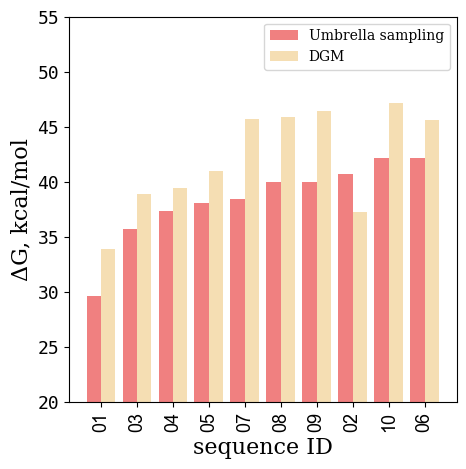

In [112]:
fig, ax = plt.subplots(figsize=(5,5))

bar_width = 0.4

# Set positions for the bars
index = np.arange(len(f_umbrella))
index1 = index - bar_width / 2
index2 = index + bar_width / 2

bars1 = ax.bar(index1, data[1].astype(float), bar_width, label='Umbrella sampling', color='lightcoral')

# Plot the bars for the second dataset
bars2 = ax.bar(index2, data[2].astype(float)*0.9, bar_width, label='DGM', color='wheat')

ax.set_xlabel('sequence ID', fontsize=16)
ax.set_ylabel('ΔG, kcal/mol', fontsize=16)

ax.set_xticks(index)
ax.set_xticklabels(data[0], fontsize=13, family='Arial', rotation=90)
ax.set_yticks(np.arange(0,60,5))
ax.set_yticklabels(np.arange(0,60,5), fontsize=13, family='monospace')

ax.set_ylim(20,55)

ax.legend()
plt.show()

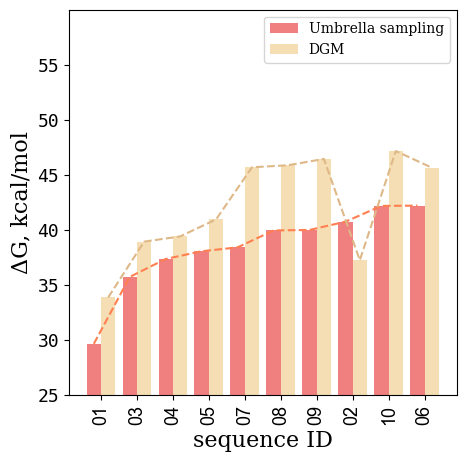

In [107]:
fig, ax = plt.subplots(figsize=(5,5))

bar_width = 0.4

# Set positions for the bars
index = np.arange(len(f_umbrella))
index1 = index - bar_width / 2
index2 = index + bar_width / 2

ax.bar(index1, data[1].astype(float), bar_width, label='Umbrella sampling', color='lightcoral')
ax.plot(index1, data[1].astype(float), '--', color='coral')

# Plot the bars for the second dataset
ax.bar(index2, data[2].astype(float)*0.9, bar_width, label='DGM', color='wheat')
ax.plot(index2, data[2].astype(float)*0.9, '--', color='burlywood')

ax.set_xlabel('sequence ID', fontsize=16)
ax.set_ylabel('ΔG, kcal/mol', fontsize=16)

ax.set_xticks(index)
ax.set_xticklabels(data[0], fontsize=13, family='Arial', rotation=90)
ax.set_yticks(np.arange(0,60,5))
ax.set_yticklabels(np.arange(0,60,5), fontsize=13, family='monospace')

ax.set_ylim(25,60)

ax.legend()
plt.show()